<a href="https://colab.research.google.com/github/robertoricci/Curso-Python-para-Mercado-Financeiro-Trading-com-Dados/blob/main/Suportes_e_resistencias_Metodo_Fractal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Definindo Suportes e Resistências** 
---
#### Aplicação de diferentes métodos
---

In [ ]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

In [ ]:
petr4_data = yf.download('PETR4.SA', start='2022-05-01')

[*********************100%***********************]  1 of 1 completed


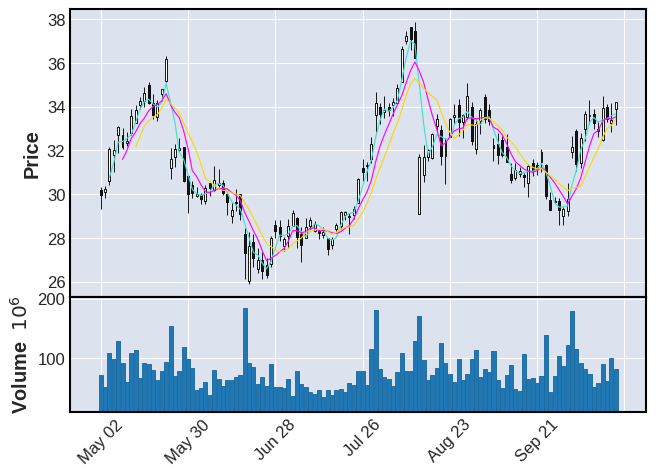

In [ ]:
mpf.plot(petr4_data,type='candle', volume=True, mav=(3,6,9))

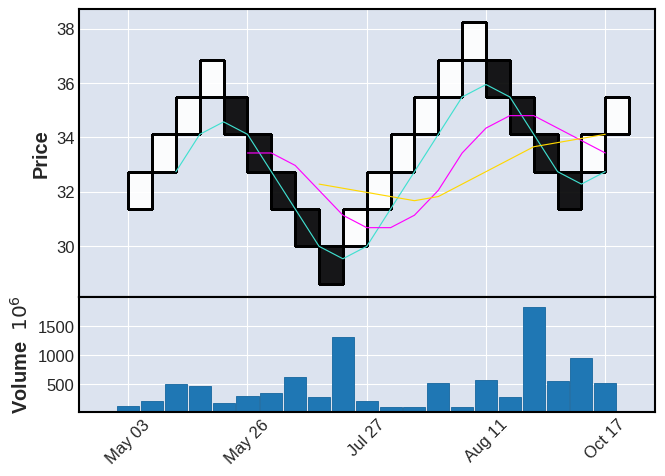

In [ ]:
mpf.plot(petr4_data,type='renko', volume=True, mav=(3,6,9))

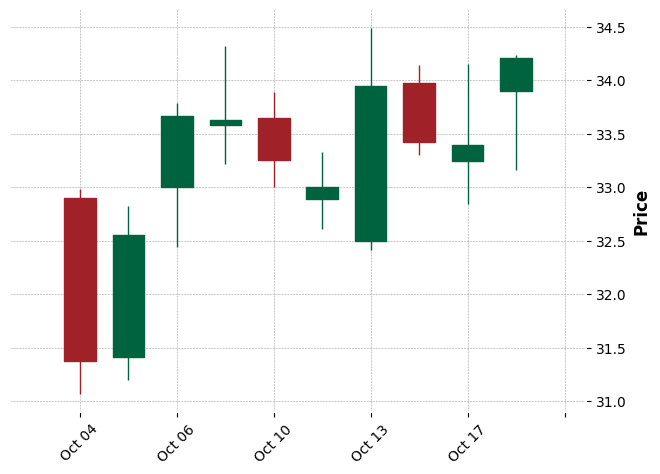

In [ ]:
mpf.plot(petr4_data.iloc[-10:],type='candle', style='charles')

## **Método 1: Fractais de candlesticks**

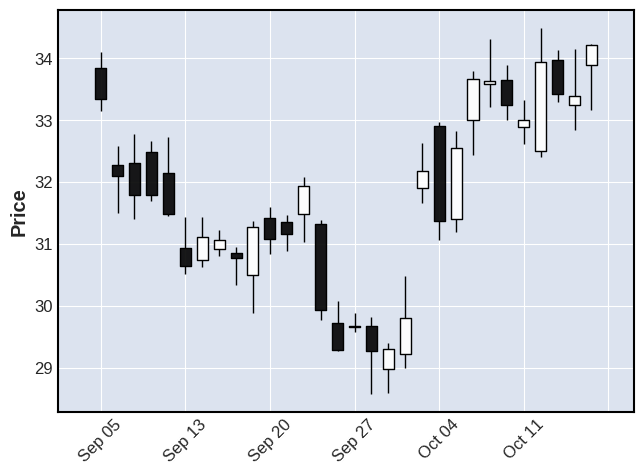

In [ ]:
mpf.plot(petr4_data[-30:],type='candle')

In [ ]:
df = yf.download('PETR4.SA', start='2022-01-01')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-03:00,28.540001,29.219999,28.530001,29.090000,19.430082,52704700
2022-01-04 00:00:00-03:00,29.160000,29.400000,28.910000,29.200001,19.503555,51739200
2022-01-05 00:00:00-03:00,29.190001,29.270000,27.940001,28.070000,18.748793,78459800
2022-01-06 00:00:00-03:00,28.290001,28.650000,27.840000,28.049999,18.735435,61163100
2022-01-07 00:00:00-03:00,28.110001,28.290001,27.820000,28.180000,18.822266,47507600
...,...,...,...,...,...,...
2022-10-11 00:00:00-03:00,32.889999,33.330002,32.610001,33.000000,33.000000,58332400
2022-10-13 00:00:00-03:00,32.500000,34.490002,32.410000,33.939999,33.939999,91143900
2022-10-14 00:00:00-03:00,33.970001,34.139999,33.299999,33.419998,33.419998,62246100


In [ ]:
def is_support(df,i):
  cond1 = df['Low'][i] < df['Low'][i-1]
  cond2 = df['Low'][i] < df['Low'][i+1]
  cond3 = df['Low'][i-1] < df['Low'][i-2]
  cond4 = df['Low'][i+1] < df['Low'][i+2]
  return (cond1 and cond2 and cond3 and cond4)

In [ ]:
def is_resistance(df,i):
  cond1 = df['High'][i] > df['High'][i-1]
  cond2 = df['High'][i] > df['High'][i+1]
  cond3 = df['High'][i-1] > df['High'][i-2]
  cond4 = df['High'][i+1] > df['High'][i+2]
  return (cond1 and cond2 and cond3 and cond4)

In [ ]:
df['Suporte'] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Suporte
Date,,,,,,,
2022-01-03 00:00:00-03:00,28.540001,29.219999,28.530001,29.090000,19.430082,52704700,NaN
2022-01-04 00:00:00-03:00,29.160000,29.400000,28.910000,29.200001,19.503555,51739200,NaN
2022-01-05 00:00:00-03:00,29.190001,29.270000,27.940001,28.070000,18.748793,78459800,NaN
2022-01-06 00:00:00-03:00,28.290001,28.650000,27.840000,28.049999,18.735435,61163100,NaN
2022-01-07 00:00:00-03:00,28.110001,28.290001,27.820000,28.180000,18.822266,47507600,NaN


In [ ]:
for i in range(2, len(df) - 2):
  if is_support(df, i):
    df['Suporte'].iloc[i] = df['Low'][i]
  else:
    df['Suporte'].iloc[i] = False

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


In [ ]:
df.tail(25)

,Open,High,Low,Close,Adj Close,Volume,Suporte
Date,,,,,,,
2022-09-13 00:00:00-03:00,30.940001,31.440001,30.520000,30.650000,30.650000,88327800,30.52
2022-09-14 00:00:00-03:00,30.750000,31.430000,30.629999,31.120001,31.120001,49039700,False
2022-09-15 00:00:00-03:00,30.920000,31.230000,30.799999,31.059999,31.059999,45553200,False
2022-09-16 00:00:00-03:00,30.860001,30.950001,30.340000,30.780001,30.780001,107303600,False
2022-09-19 00:00:00-03:00,30.500000,31.379999,29.879999,31.270000,31.270000,65559900,29.879999
2022-09-20 00:00:00-03:00,31.420000,31.600000,30.840000,31.090000,31.090000,67798200,False
2022-09-21 00:00:00-03:00,31.350000,31.469999,30.889999,31.170000,31.170000,58812200,False
2022-09-22 00:00:00-03:00,31.480000,32.080002,31.030001,31.940001,31.940001,69764300,False
2022-09-23 00:00:00-03:00,31.320000,31.389999,29.770000,29.940001,29.940001,138630800,False


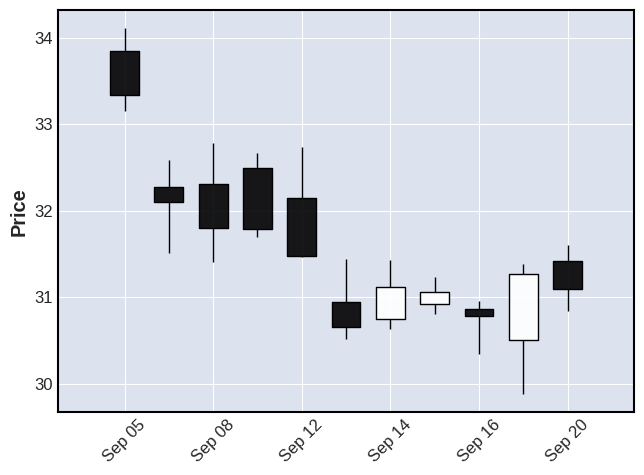

In [ ]:
mpf.plot(df[-30:-19],type='candle')

In [ ]:
df['Resistencia'] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(2, df.shape[0] - 2):
  if is_resistance(df, i):
    df['Resistencia'].iloc[i] = df['High'][i]
  else:
    df['Resistencia'].iloc[i] = False

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj._check_is_chained_assignment_possible()


In [ ]:
df[(df['Suporte']!=False) | (df['Resistencia']!=False)].tail(10)

,Open,High,Low,Close,Adj Close,Volume,Suporte,Resistencia
Date,,,,,,,,
2022-08-12 00:00:00-03:00,29.100000,31.830000,29.080000,31.709999,31.709999,171288300,29.08,False
2022-08-18 00:00:00-03:00,33.099998,33.660000,32.869999,33.419998,33.419998,84552500,False,33.66
2022-08-22 00:00:00-03:00,31.740000,32.580002,30.480000,32.410000,32.410000,92400300,30.48,False
2022-08-31 00:00:00-03:00,32.070000,33.439999,31.820000,33.230000,33.230000,114235400,31.82,False
2022-09-02 00:00:00-03:00,34.439999,34.570000,33.259998,33.419998,33.419998,81792300,False,34.57
2022-09-13 00:00:00-03:00,30.940001,31.440001,30.520000,30.650000,30.650000,88327800,30.52,False
2022-09-19 00:00:00-03:00,30.500000,31.379999,29.879999,31.270000,31.270000,65559900,29.879999,False
2022-10-07 00:00:00-03:00,33.580002,34.320000,33.220001,33.630001,33.630001,73500100,False,34.32
2022-10-17 00:00:00-03:00,33.240002,34.150002,32.840000,33.389999,33.389999,100936400,NaN,NaN


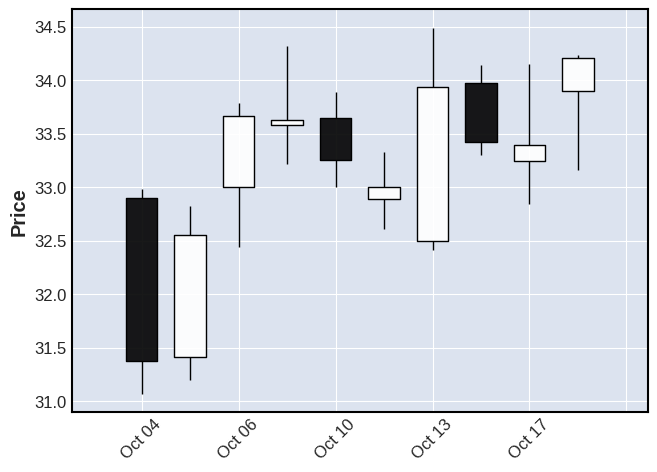

In [ ]:
mpf.plot(df[-10:],type='candle')

In [ ]:
levels = []
level_types = []
for i in range(2, df.shape[0] - 2):

  if is_support(df, i):
    levels.append((i, df['Low'][i].round(2)))
    level_types.append('Support')

  elif is_resistance(df, i):
    levels.append((i, df['High'][i].round(2)))
    level_types.append('Resistance')

In [ ]:
levels[0:10]

[(5, 27.72),
 (12, 32.21),
 (18, 34.64),
 (34, 32.27),
 (44, 31.51),
 (51, 29.5),
 (56, 32.6),
 (70, 34.8),
 (72, 30.47),
 (76, 29.54)]

In [ ]:
level_types[0:10]

['Support',
 'Resistance',
 'Resistance',
 'Support',
 'Support',
 'Support',
 'Resistance',
 'Resistance',
 'Support',
 'Support']

In [ ]:
from mplfinance.original_flavor import candlestick_ohlc

In [ ]:
df = df.iloc[:,0:4]
df.insert(0, column='Date', value=df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)

In [ ]:
def plot_levels():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
  
  for level, level_type in zip(levels, level_types):
    plt.hlines(level[1],
               xmin = df.index[level[0]],
               xmax = max(df.index),
               colors = 'blue')
    plt.text(df.index[level[0]], level[1], (str(level_type) + ': ' + str(level[1]) + ' '), ha='right', va='center', fontweight='bold', fontsize='x-small')
    plt.title('Support and Resistance levels for ' + 'PETR4', fontsize=12, fontweight='bold')
    fig.show()

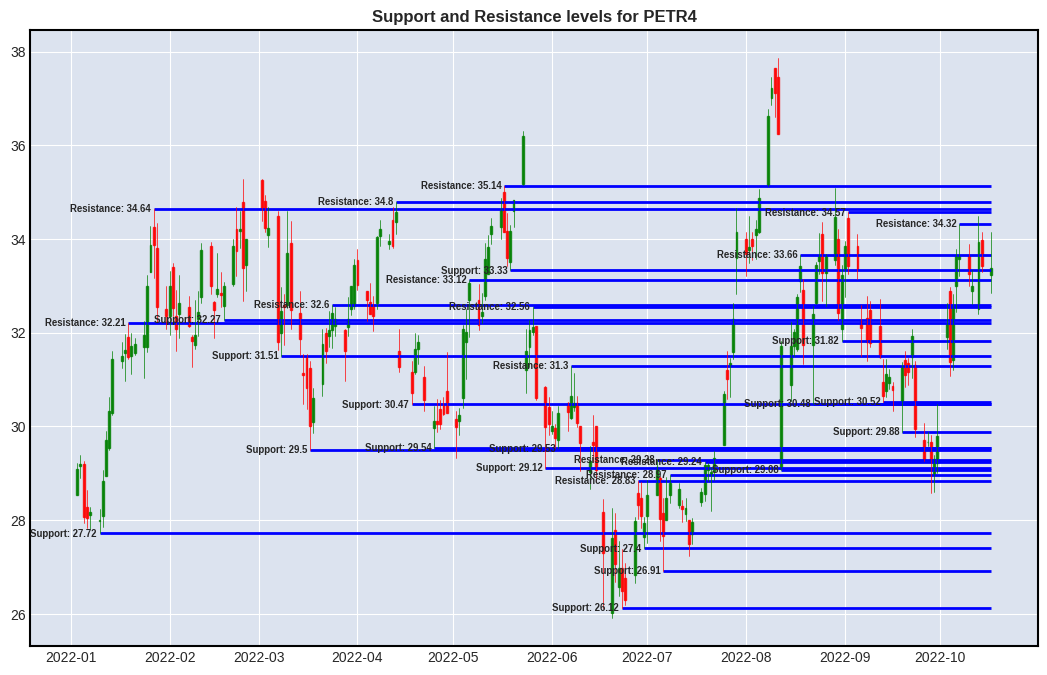

In [ ]:
plt.rcParams['figure.figsize'] = [13, 8]
plt.rc('font', size=10)
plot_levels()

In [ ]:
def is_far_from_level(value, levels, df):
  ave =  np.mean(df['High'] - df['Low'])
  return np.sum([abs(value-level)<ave for _,level in levels])==0

In [ ]:
levels = []
level_types = []

for i in range(2, df.shape[0] - 2):

  if is_support(df, i):
    low = df['Low'][i]
    if is_far_from_level(low, levels, df):
      levels.append((i, df['Low'][i].round(2)))
      level_types.append('Support')

  elif is_resistance(df, i):
    high = df['High'][i]
    if is_far_from_level(high, levels, df):
      levels.append((i, df['High'][i].round(2)))
      level_types.append('Resistance')

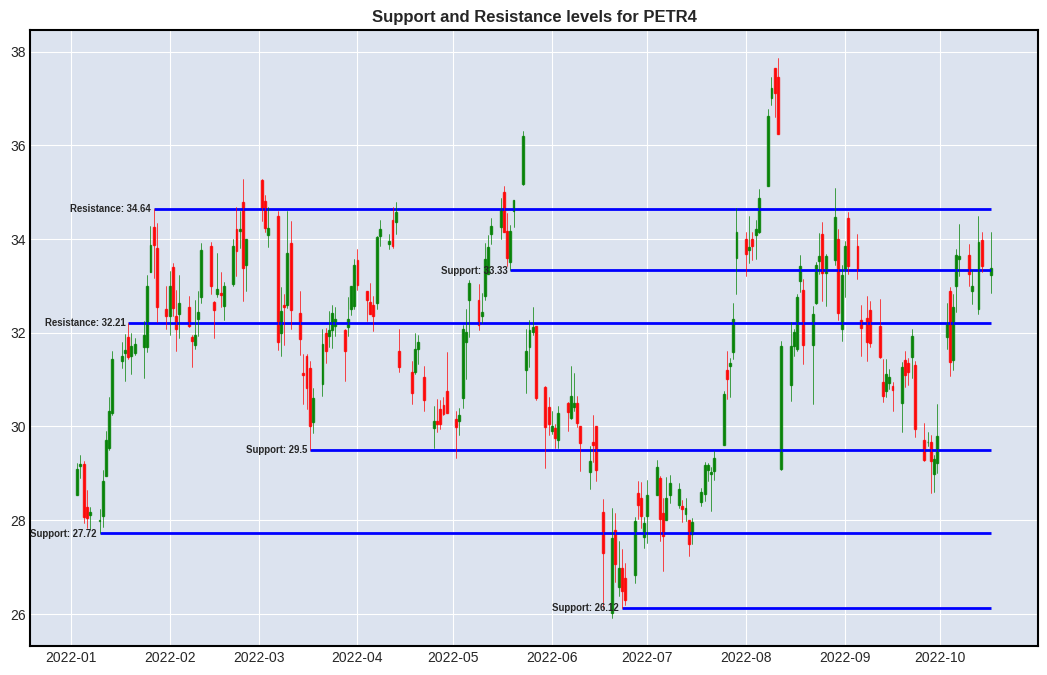

In [ ]:
def plot_levels():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
  
  for level, level_type in zip(levels, level_types):
    plt.hlines(level[1],
               xmin = df.index[level[0]],
               xmax = max(df.index),
               colors = 'blue')
    plt.text(df.index[level[0]], level[1], (str(level_type) + ': ' + str(level[1]) + ' '), ha='right', va='center', fontweight='bold', fontsize='x-small')
    plt.title('Support and Resistance levels for ' + 'PETR4', fontsize=12, fontweight='bold')
    fig.show()

plot_levels()